<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Shivam Patil</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300097</td>
  </tr>
  <tr>
    <td class="tg-0pky col1">Course</td>
    <td class="tg-0pky col2">Advanced Data Visualization</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 5</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">Aim</th>
    <th class="tg-0pky col2">
      Create advanced charts using R programming language on the dataset - Housing data
      <br>  
      1. Advanced - Word chart, Box and whisker plot, Violin plot, Regression plot (linear and nonlinear), 3D chart, Jitter
      <br>  
      2. Write observations from each chart 
    </th>
  </tr>
</thead>
</table> 

### Dataset Description:
This dataset contains real estate property listings with key features such as price, area, number of bedrooms, bathrooms, and stories. It also includes several binary and categorical variables that represent property amenities like access to a main road, presence of a guestroom, basement, hot water heating, air conditioning, parking, and preferred area. Additionally, the dataset captures the furnishing status of the property, with values such as furnished, semi-furnished, and unfurnished. This information provides a comprehensive view of each property’s attributes for potential buyers.

### Metadata:

| Variable           | Description                                      | Data Type    |
|--------------------|--------------------------------------------------|--------------|
| price              | Property price in currency units                  | Integer      |
| area               | Total area of the property in square feet         | Integer      |
| bedrooms           | Number of bedrooms in the property                | Integer      |
| bathrooms          | Number of bathrooms in the property               | Integer      |
| stories            | Number of stories the property has                | Integer      |
| mainroad           | Whether the property has access to a main road    | Categorical  |
| guestroom          | Whether the property has a guestroom              | Categorical  |
| basement           | Whether the property has a basement               | Categorical  |
| hotwaterheating    | Whether the property has hot water heating        | Categorical  |
| airconditioning    | Whether the property has air conditioning         | Categorical  |
| parking            | Number of parking spaces available                | Integer      |
| prefarea           | Whether the property is in a preferred area       | Categorical  |
| furnishingstatus   | The furnishing status of the property             | Categorical  |

### 1. Importing Libraries and Dataset

In [32]:
library(ggplot2)
library(dplyr)
library(lintr)
library(lubridate)
library(wordcloud)
library(RColorBrewer)
library(plotly)
library(tm)
library(quanteda)
library(scatterplot3d)

### 2. Data Preprocessing

In [22]:
data <- read.csv("../Datasets/Housing.csv")
head(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


<p style="page-break-after:always;"></p>

### 3. Advanced Plots

#### 3.1 Word Cloud

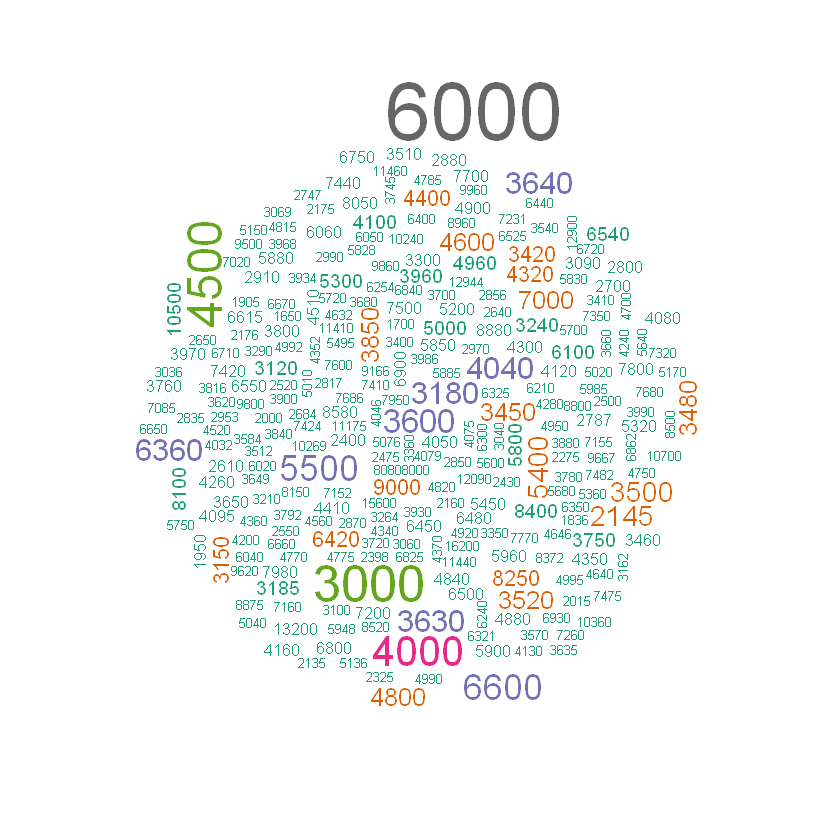

In [23]:
# Convert the 'area' column to a character vector
real_estate_data <- data
real_estate_data$area <- as.character(real_estate_data$area)

# Create a corpus from the 'area' column
area_corpus <- corpus(real_estate_data$area)
dfm_area <- dfm(tokens(area_corpus))
word_freqs_area <- topfeatures(dfm_area, n = nrow(dfm_area))

# Create the word cloud
wordcloud(names(word_freqs_area), freq = word_freqs_area, min.freq = 1, colors = brewer.pal(8, "Dark2"))

#### 3.2 Box and Whisker Plot

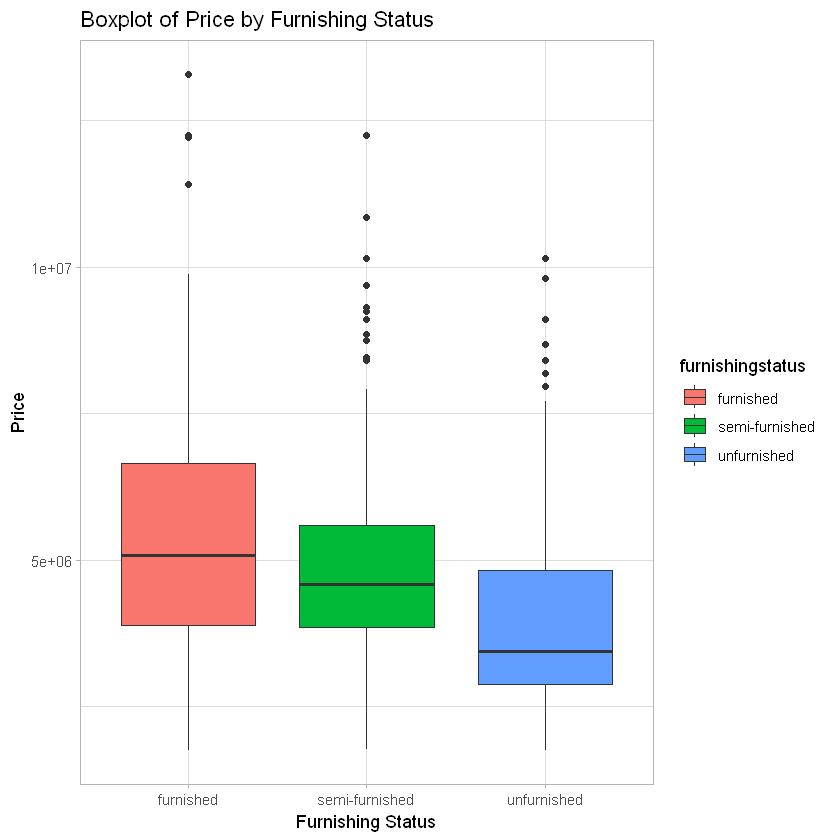

In [24]:
ggplot(data, aes(x = furnishingstatus, y = price, fill = furnishingstatus)) +
    geom_boxplot() +
    labs(
        title = "Boxplot of Price by Furnishing Status",
        x = "Furnishing Status",
        y = "Price"
    ) +
    theme_light()


#### 3.3 Violin Plot

Warning message:
"Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes."


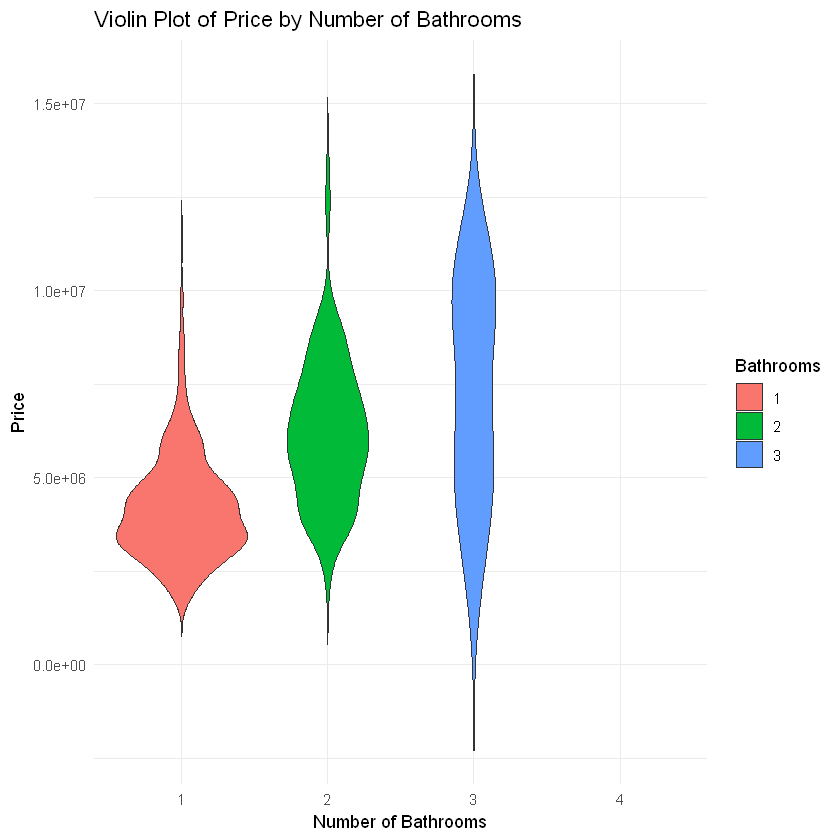

In [25]:
# Create the violin plot: Price by Number of Bathrooms
ggplot(data, aes(x = factor(bathrooms), y = price, fill = factor(bathrooms))) +
    geom_violin(trim = FALSE) +
    labs(
        title = "Violin Plot of Price by Number of Bathrooms",
        x = "Number of Bathrooms",
        y = "Price",
        fill = "Bathrooms"
    ) +
    theme_minimal()

#### 3.4 Linear Regression Plot


Call:
lm(formula = price ~ area + bedrooms + bathrooms + stories + 
    parking, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3396744  -731825   -64056   601486  5651126 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -145734.5   246634.5  -0.591   0.5548    
area            331.1       26.6  12.448  < 2e-16 ***
bedrooms     167809.8    82932.7   2.023   0.0435 *  
bathrooms   1133740.2   118828.3   9.541  < 2e-16 ***
stories      547939.8    68894.5   7.953 1.07e-14 ***
parking      377596.3    66804.1   5.652 2.57e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1244000 on 539 degrees of freedom
Multiple R-squared:  0.5616,	Adjusted R-squared:  0.5575 
F-statistic: 138.1 on 5 and 539 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


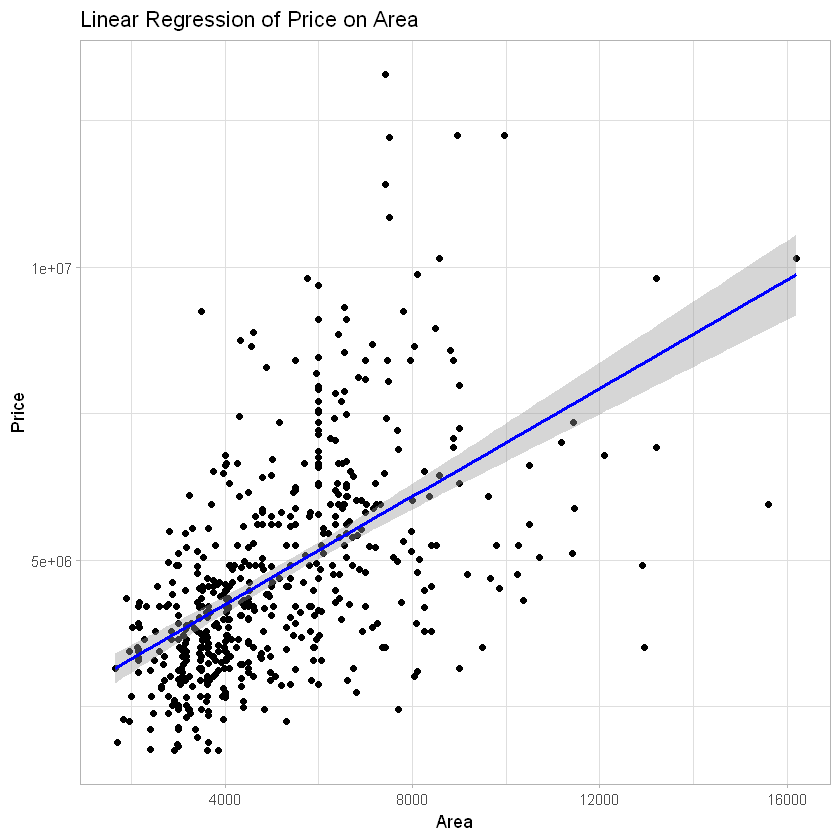

In [29]:
linear_model <- lm(price ~ area + bedrooms + bathrooms + stories + parking, data = data)
summary(linear_model)

# Plot the regression
ggplot(data, aes(x = area, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", col = "blue") +
    labs(
        title = "Linear Regression of Price on Area",
        x = "Area",
        y = "Price"
    ) +
    theme_light()

#### 3.5 Nonlinear Regression Plot


Call:
lm(formula = price ~ poly(area, 2) + bedrooms + bathrooms + stories + 
    parking, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3324926  -752806   -51912   603035  5552968 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1620839     231351   7.006 7.36e-12 ***
poly(area, 2)1 17026113    1328575  12.815  < 2e-16 ***
poly(area, 2)2 -5116230    1246132  -4.106 4.66e-05 ***
bedrooms         182055      81813   2.225   0.0265 *  
bathrooms       1119057     117173   9.550  < 2e-16 ***
stories          512514      68449   7.488 2.89e-13 ***
parking          347982      66237   5.254 2.15e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1226000 on 538 degrees of freedom
Multiple R-squared:  0.5749,	Adjusted R-squared:  0.5702 
F-statistic: 121.3 on 6 and 538 DF,  p-value: < 2.2e-16


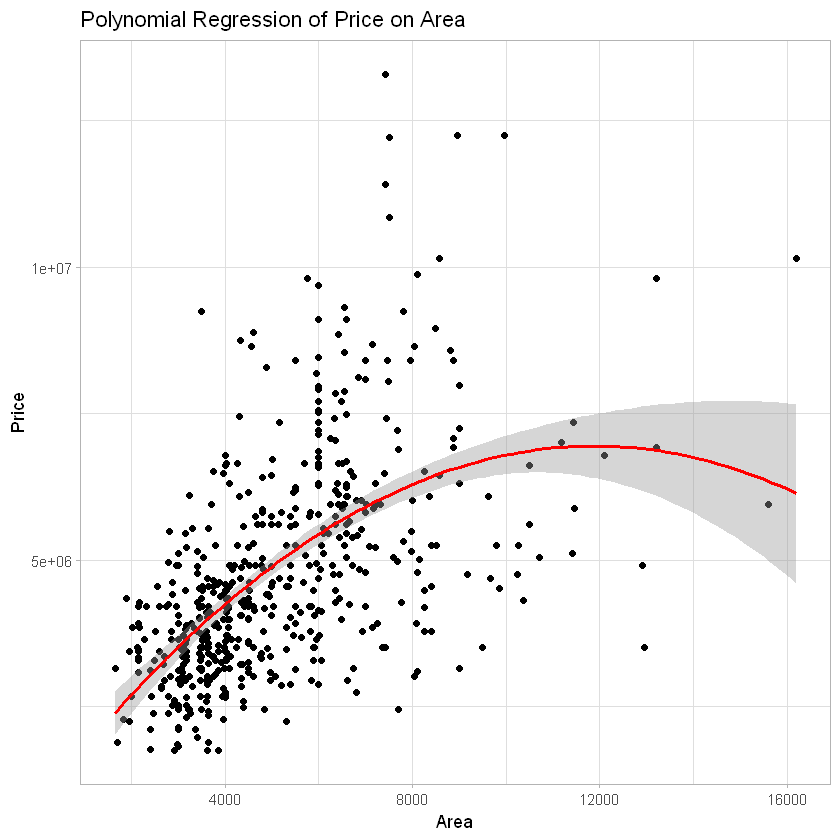

In [30]:
poly_model <- lm(price ~ poly(area, 2) + bedrooms + bathrooms + stories + parking, data = data)
summary(poly_model)

# Plot the polynomial regression
ggplot(data, aes(x = area, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), col = "red") +
    labs(
        title = "Polynomial Regression of Price on Area",
        x = "Area",
        y = "Price"
    ) +
    theme_light()

#### 3.6 3D Scatter Plot

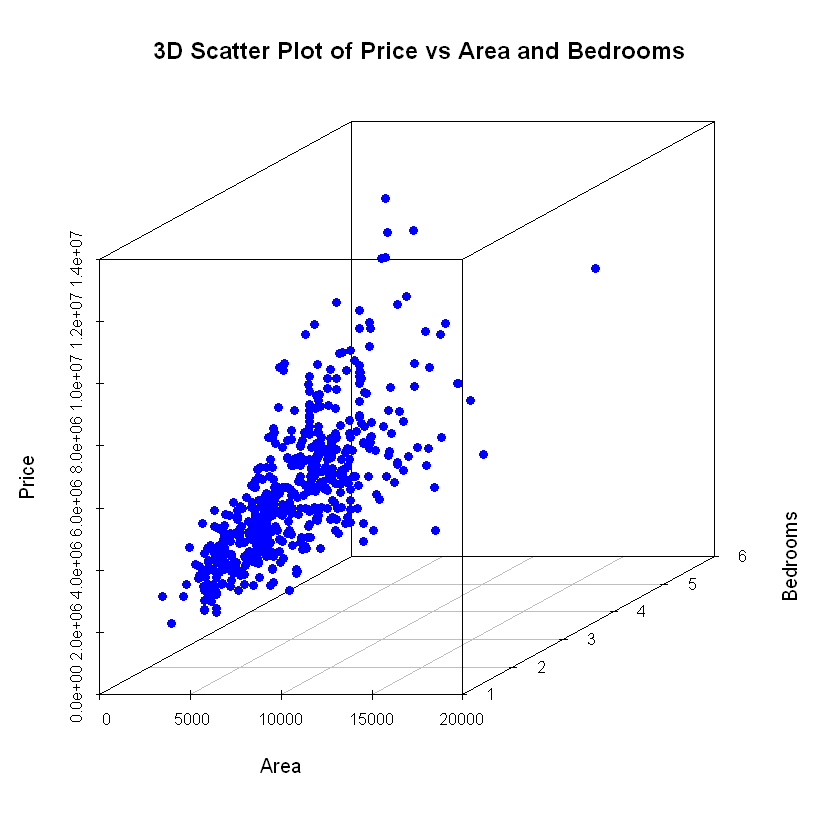

In [35]:
# Create the 3D scatter plot with price, area, and bedrooms
scatter_3d <- scatterplot3d(data$area, data$bedrooms, data$price,
    pch = 16, # Use solid circles for points
    color = "blue", # Set point color to blue
    xlab = "Area", # Label for x-axis
    ylab = "Bedrooms", # Label for y-axis
    zlab = "Price", # Label for z-axis
    main = "3D Scatter Plot of Price vs Area and Bedrooms"
)

#### 3.7 Jitter Plot

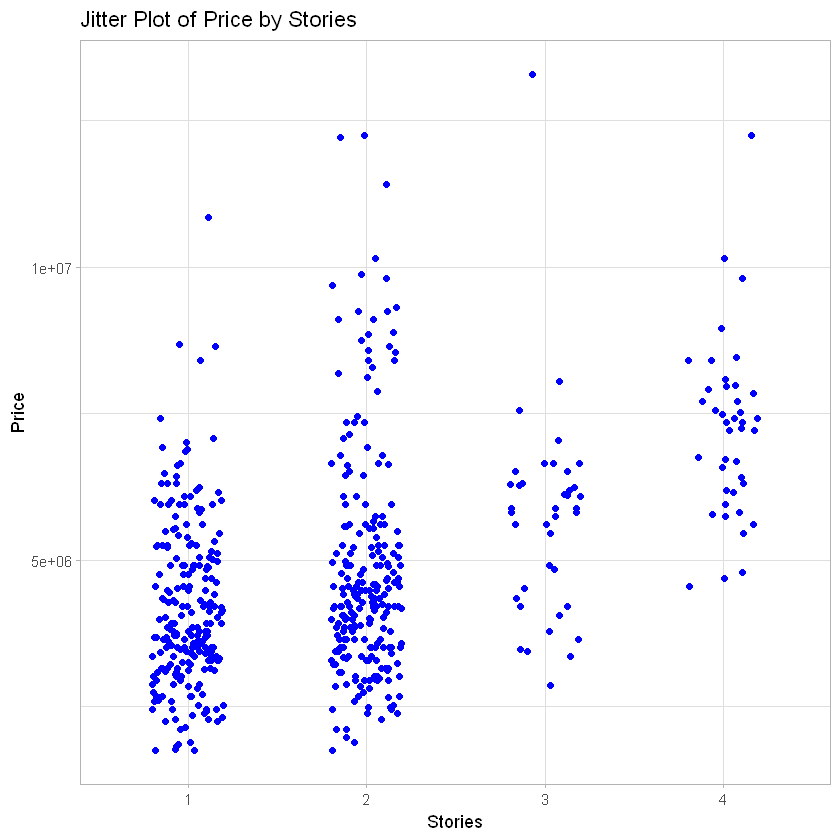

In [41]:
# Create the jitter plot for price by stories
ggplot(data, aes(x = as.factor(stories), y = price)) +
    geom_jitter(color = "blue", width = 0.2, height = 0) + # Jitter to avoid overlap
    labs(
        title = "Jitter Plot of Price by Stories",
        x = "Stories",
        y = "Price"
    ) +
    theme_light()

<p style="page-break-after:always;"></p>

### Conclusion
In this experiment, we learned how to create advanced charts using the R programming language on the dataset - Housing data. We created word clouds, box and whisker plots, violin plots, linear and nonlinear regression plots, 3D scatter plots, and jitter plots. We also wrote observations from each chart. These advanced charts provide a comprehensive view of the dataset and help in understanding the relationships between different variables.